# СЕМИНАР 10: РАНГОВЫЕ КРИТЕРИИ

Немного поговорим о том, как добиваться неплохих результатов в стат. тестах, не используя жесткие предпосылки

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12
np.random.seed(42)

## КРИТЕРИЙ ЗНАКОВ

=== КРИТЕРИЙ ЗНАКОВ ===
Положительных разностей: 21
Отрицательных разностей: 9
Нулевых разностей: 0
P-value: 0.0428


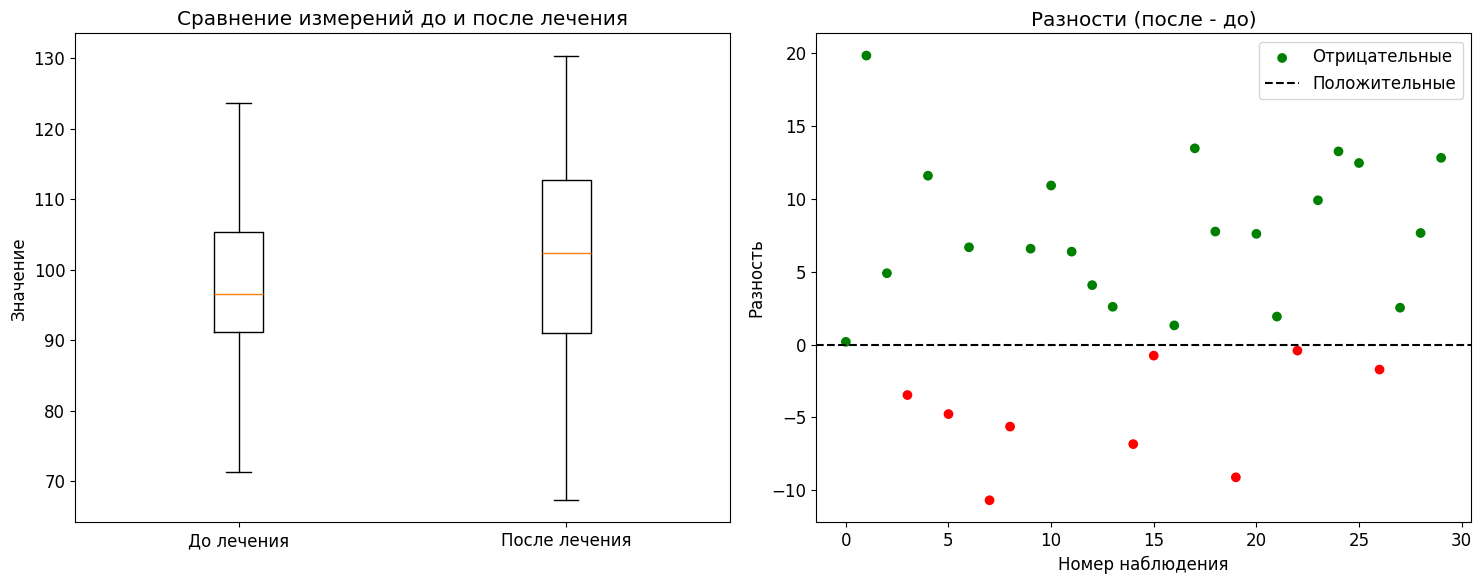

In [ ]:
# Синтетические данные - измерение до и после лечения
np.random.seed(42)
n = 30
before = np.random.normal(100, 15, n)
after = before + np.random.normal(5, 8, n)  # Добавляем эффект лечения

# Критерий знаков
def sign_test(x, y=None, median=0):
    if y is not None:
        differences = x - y
    else:
        differences = x - median
    
    n = len(differences)
    n_plus = np.sum(differences > 0)
    n_minus = np.sum(differences < 0)
    n_zero = np.sum(differences == 0)
    
    # Биномиальный тест
    p_value = stats.binomtest(min(n_plus, n_minus), n_plus + n_minus, p=0.5).pvalue
    
    return n_plus, n_minus, n_zero, p_value

# Применяем критерий знаков
n_plus, n_minus, n_zero, p_value = sign_test(after, before)

print(f"Положительных разностей: {n_plus}")
print(f"Отрицательных разностей: {n_minus}") 
print(f"Нулевых разностей: {n_zero}")
print(f"P-value: {p_value:.4f}")

# Визуализация
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Боксплот
axes[0].boxplot([before, after], labels=['До лечения', 'После лечения'])
axes[0].set_title('Сравнение измерений до и после лечения')
axes[0].set_ylabel('Значение')

# Разности
differences = after - before
axes[1].scatter(range(len(differences)), differences, c=['red' if d < 0 else 'green' for d in differences])
axes[1].axhline(y=0, color='black', linestyle='--')
axes[1].set_title('Разности (после - до)')
axes[1].set_xlabel('Номер наблюдения')
axes[1].set_ylabel('Разность')
axes[1].legend(['Отрицательные', 'Положительные'])

plt.tight_layout()
plt.show()

## КРИТЕРИЙ ВИЛКОКСОНА

Проверяемая медиана: 105
Статистика Вилкоксона: 177.00
P-value: 0.2621


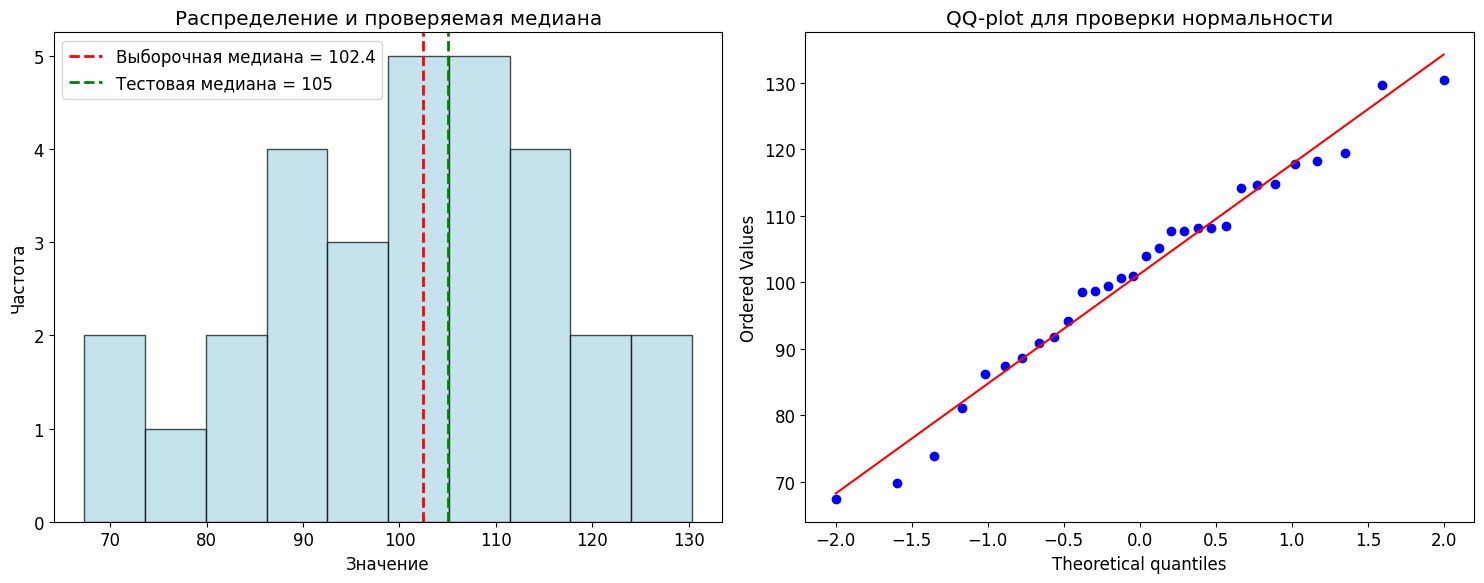

In [13]:
# Проверка гипотезы о медиане = 105
test_median = 105

# Критерий Вилкоксона
wilcoxon_stat, wilcoxon_p = stats.wilcoxon(after - test_median)

print(f"Проверяемая медиана: {test_median}")
print(f"Статистика Вилкоксона: {wilcoxon_stat:.2f}")
print(f"P-value: {wilcoxon_p:.4f}")

# Визуализация
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Гистограмма с медианой
axes[0].hist(after, bins=10, alpha=0.7, color='lightblue', edgecolor='black')
axes[0].axvline(np.median(after), color='red', linestyle='--', linewidth=2, label=f'Выборочная медиана = {np.median(after):.1f}')
axes[0].axvline(test_median, color='green', linestyle='--', linewidth=2, label=f'Тестовая медиана = {test_median}')
axes[0].set_title('Распределение и проверяемая медиана')
axes[0].set_xlabel('Значение')
axes[0].set_ylabel('Частота')
axes[0].legend()

# QQ-plot для проверки нормальности
stats.probplot(after, dist="norm", plot=axes[1])
axes[1].set_title('QQ-plot для проверки нормальности')

plt.tight_layout()
plt.show()

## КРИТЕРИЙ АНСАРИ-БРЕДЛИ

=== КРИТЕРИЙ АНСАРИ-БРЕДЛИ ===
Стандартные отклонения: Group 1 = 5.18, Group 2 = 10.62
Статистика: 383.00
P-value: 0.0246


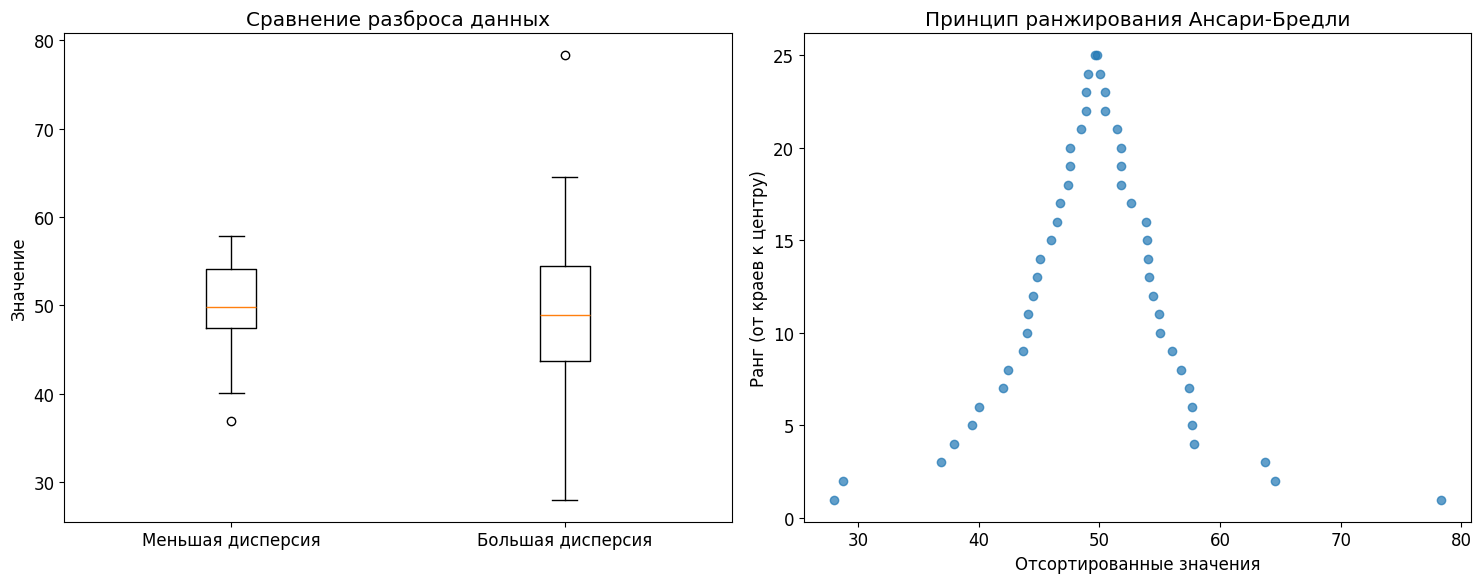

In [ ]:
# Группы с разными дисперсиями
group_var1 = np.random.normal(50, 5, 25)    # Меньшая дисперсия
group_var2 = np.random.normal(50, 15, 25)   # Большая дисперсия

# Критерий Ансари-Бредли
ansari_stat, ansari_p = stats.ansari(group_var1, group_var2)

print("КРИТЕРИЙ АНСАРИ-БРЕДЛИ")
print(f"Стандартные отклонения: Group 1 = {np.std(group_var1):.2f}, Group 2 = {np.std(group_var2):.2f}")
print(f"Статистика: {ansari_stat:.2f}")
print(f"P-value: {ansari_p:.4f}")

# Визуализация
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Боксплот для дисперсий
axes[0].boxplot([group_var1, group_var2], labels=['Меньшая дисперсия', 'Большая дисперсия'])
axes[0].set_title('Сравнение разброса данных')
axes[0].set_ylabel('Значение')

# Ранжирование
combined = np.concatenate([group_var1, group_var2])
sorted_combined = np.sort(combined)
n = len(combined)

# Ранги от краев к центру
center_ranks = []
for i in range(n):
    if i < n/2:
        center_ranks.append(i + 1)
    else:
        center_ranks.append(n - i)

axes[1].scatter(sorted_combined, center_ranks, alpha=0.7)
axes[1].set_title('Принцип ранжирования Ансари-Бредли')
axes[1].set_xlabel('Отсортированные значения')
axes[1].set_ylabel('Ранг (от краев к центру)')

plt.tight_layout()
plt.show()

## НАЛИЧИЕ ВЗАИМОСВЯЗИ

=== КОРРЕЛЯЦИЯ СПИРМЕНА ===
Корреляция Пирсона: r = 0.941, p = 0.0000
Корреляция Спирмена: ρ = 0.944, p = 0.0000


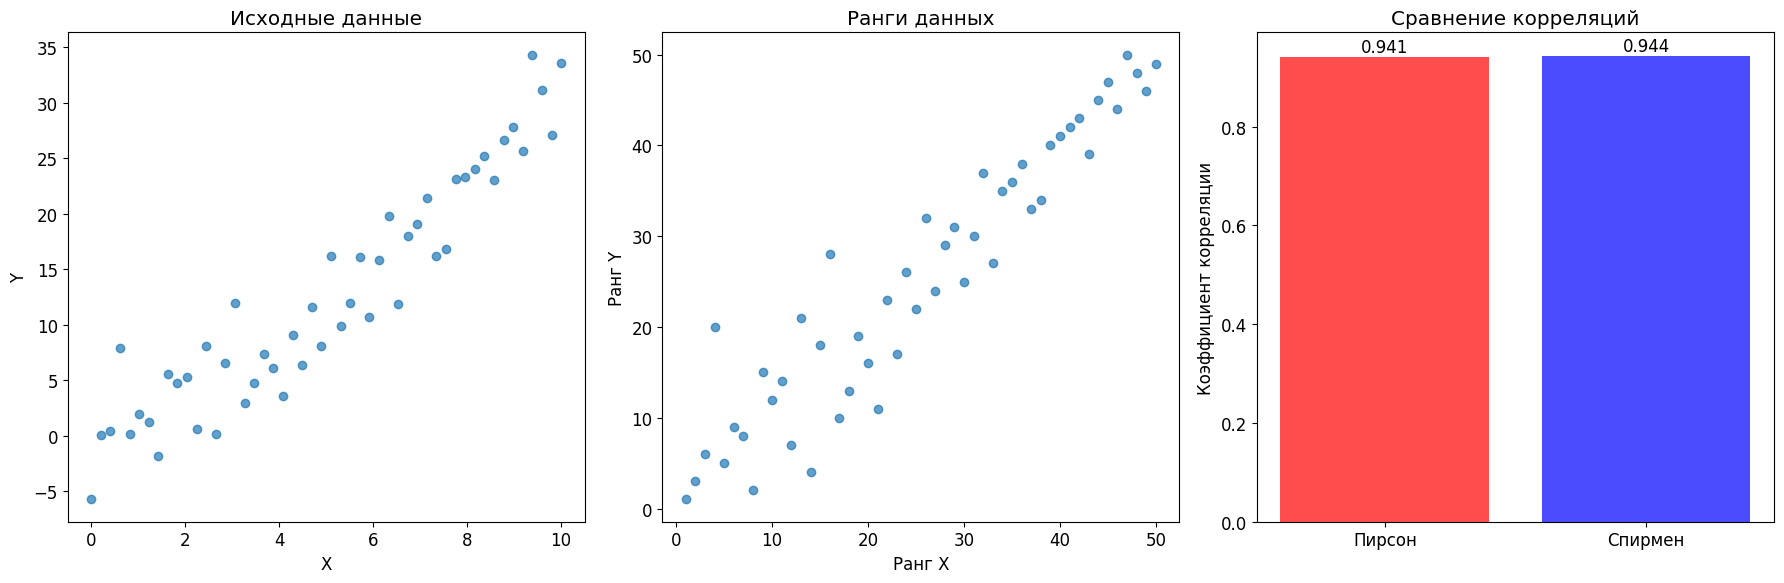

In [ ]:
# Создаем данные с монотонной, но нелинейной зависимостью
x_spearman = np.linspace(0, 10, 50)
y_spearman = x_spearman**1.5 + np.random.normal(0, 3, 50)  # Нелинейная зависимость

# Корреляции
pearson_r, pearson_p = stats.pearsonr(x_spearman, y_spearman)
spearman_rho, spearman_p = stats.spearmanr(x_spearman, y_spearman)

print(f"Корреляция Пирсона: r = {pearson_r:.3f}, p = {pearson_p:.4f}")
print(f"Корреляция Спирмена: ρ = {spearman_rho:.3f}, p = {spearman_p:.4f}")

# Визуализация
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Исходные данные
axes[0].scatter(x_spearman, y_spearman, alpha=0.7)
axes[0].set_title('Исходные данные')
axes[0].set_xlabel('X')
axes[0].set_ylabel('Y')

# Ранги
x_ranks = stats.rankdata(x_spearman)
y_ranks = stats.rankdata(y_spearman)

axes[1].scatter(x_ranks, y_ranks, alpha=0.7)
axes[1].set_title('Ранги данных')
axes[1].set_xlabel('Ранг X')
axes[1].set_ylabel('Ранг Y')

# Сравнение
methods = ['Пирсон', 'Спирмен']
correlations = [pearson_r, spearman_rho]
colors = ['red', 'blue']

axes[2].bar(methods, correlations, color=colors, alpha=0.7)
axes[2].set_title('Сравнение корреляций')
axes[2].set_ylabel('Коэффициент корреляции')
for i, v in enumerate(correlations):
    axes[2].text(i, v + 0.01, f'{v:.3f}', ha='center')

plt.tight_layout()
plt.show()

Корреляция Пирсона (с выбросами): r = 0.647, p = 0.0000
Корреляция Спирмена (с выбросами): ρ = 0.657, p = 0.0000
Корреляция Кендалла (с выбросами): τ = 0.680, p = 0.0000


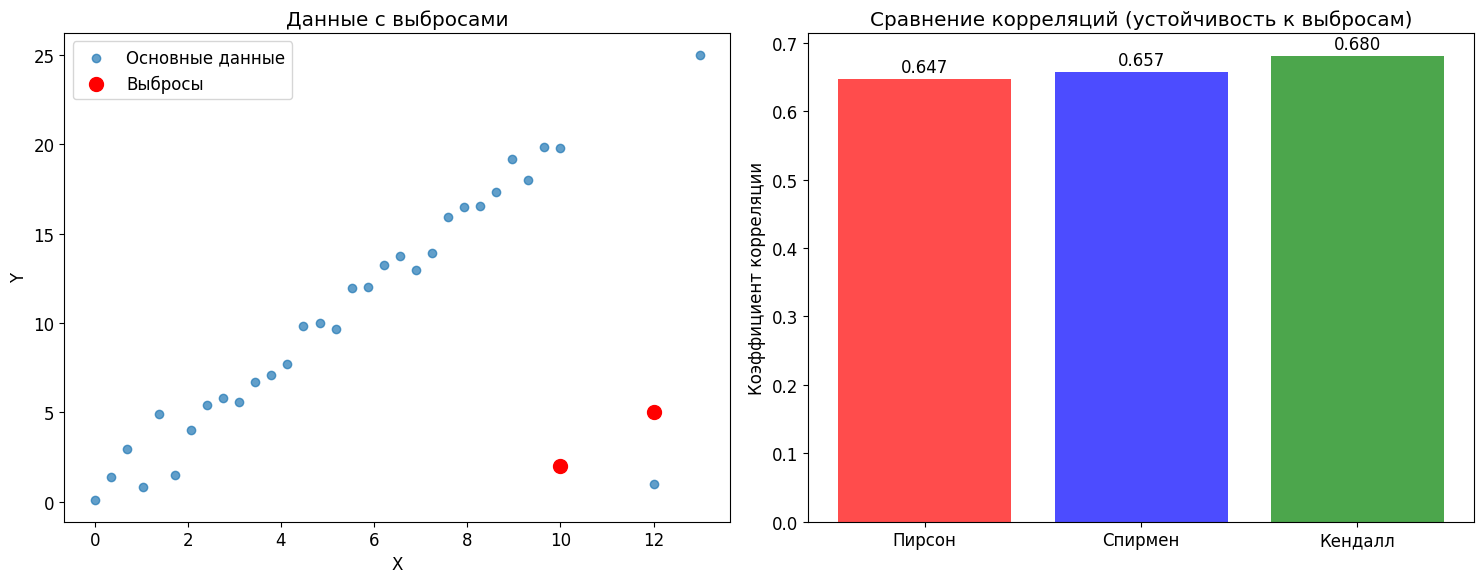

In [11]:
# Данные с выбросами для демонстрации устойчивости Кендалла
x_kendall = np.linspace(0, 10, 30)
y_kendall = 2*x_kendall + np.random.normal(0, 1, 30)

# Добавляем выбросы
x_kendall = np.append(x_kendall, [12, 13, 10, 12])
y_kendall = np.append(y_kendall, [1, 25, 2, 5])  # Выбросы

# Корреляции
kendall_tau, kendall_p = stats.kendalltau(x_kendall, y_kendall)
spearman_rho_out, spearman_p_out = stats.spearmanr(x_kendall, y_kendall)
pearson_r_out, pearson_p_out = stats.pearsonr(x_kendall, y_kendall)

print(f"Корреляция Пирсона (с выбросами): r = {pearson_r_out:.3f}, p = {pearson_p_out:.4f}")
print(f"Корреляция Спирмена (с выбросами): ρ = {spearman_rho_out:.3f}, p = {spearman_p_out:.4f}")
print(f"Корреляция Кендалла (с выбросами): τ = {kendall_tau:.3f}, p = {kendall_p:.4f}")

# Визуализация
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Данные с выбросами
axes[0].scatter(x_kendall[:-2], y_kendall[:-2], alpha=0.7, label='Основные данные')
axes[0].scatter(x_kendall[-2:], y_kendall[-2:], color='red', s=100, label='Выбросы')
axes[0].set_title('Данные с выбросами')
axes[0].set_xlabel('X')
axes[0].set_ylabel('Y')
axes[0].legend()

# Сравнение методов с выбросами
methods = ['Пирсон', 'Спирмен', 'Кендалл']
correlations_out = [pearson_r_out, spearman_rho_out, kendall_tau]
colors = ['red', 'blue', 'green']

axes[1].bar(methods, correlations_out, color=colors, alpha=0.7)
axes[1].set_title('Сравнение корреляций (устойчивость к выбросам)')
axes[1].set_ylabel('Коэффициент корреляции')
for i, v in enumerate(correlations_out):
    axes[1].text(i, v + 0.01, f'{v:.3f}', ha='center')

plt.tight_layout()
plt.show()

## Немного ранговых критериев в реальном датасете

Размер данных: (150, 5)

Первые 5 строк:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  
Setosa vs Versicolor: U = 168.5, p = 0.000000
Setosa vs Virginica: U = 38.5, p = 0.000000
Versicolor vs Virginica: U = 526.0, p = 0.000001

Корреляция длина чашелистика vs длина лепестка:
Спирмен: ρ = 0.882, p = 0.000000
Кендалл: τ = 0.719, p = 0.000000


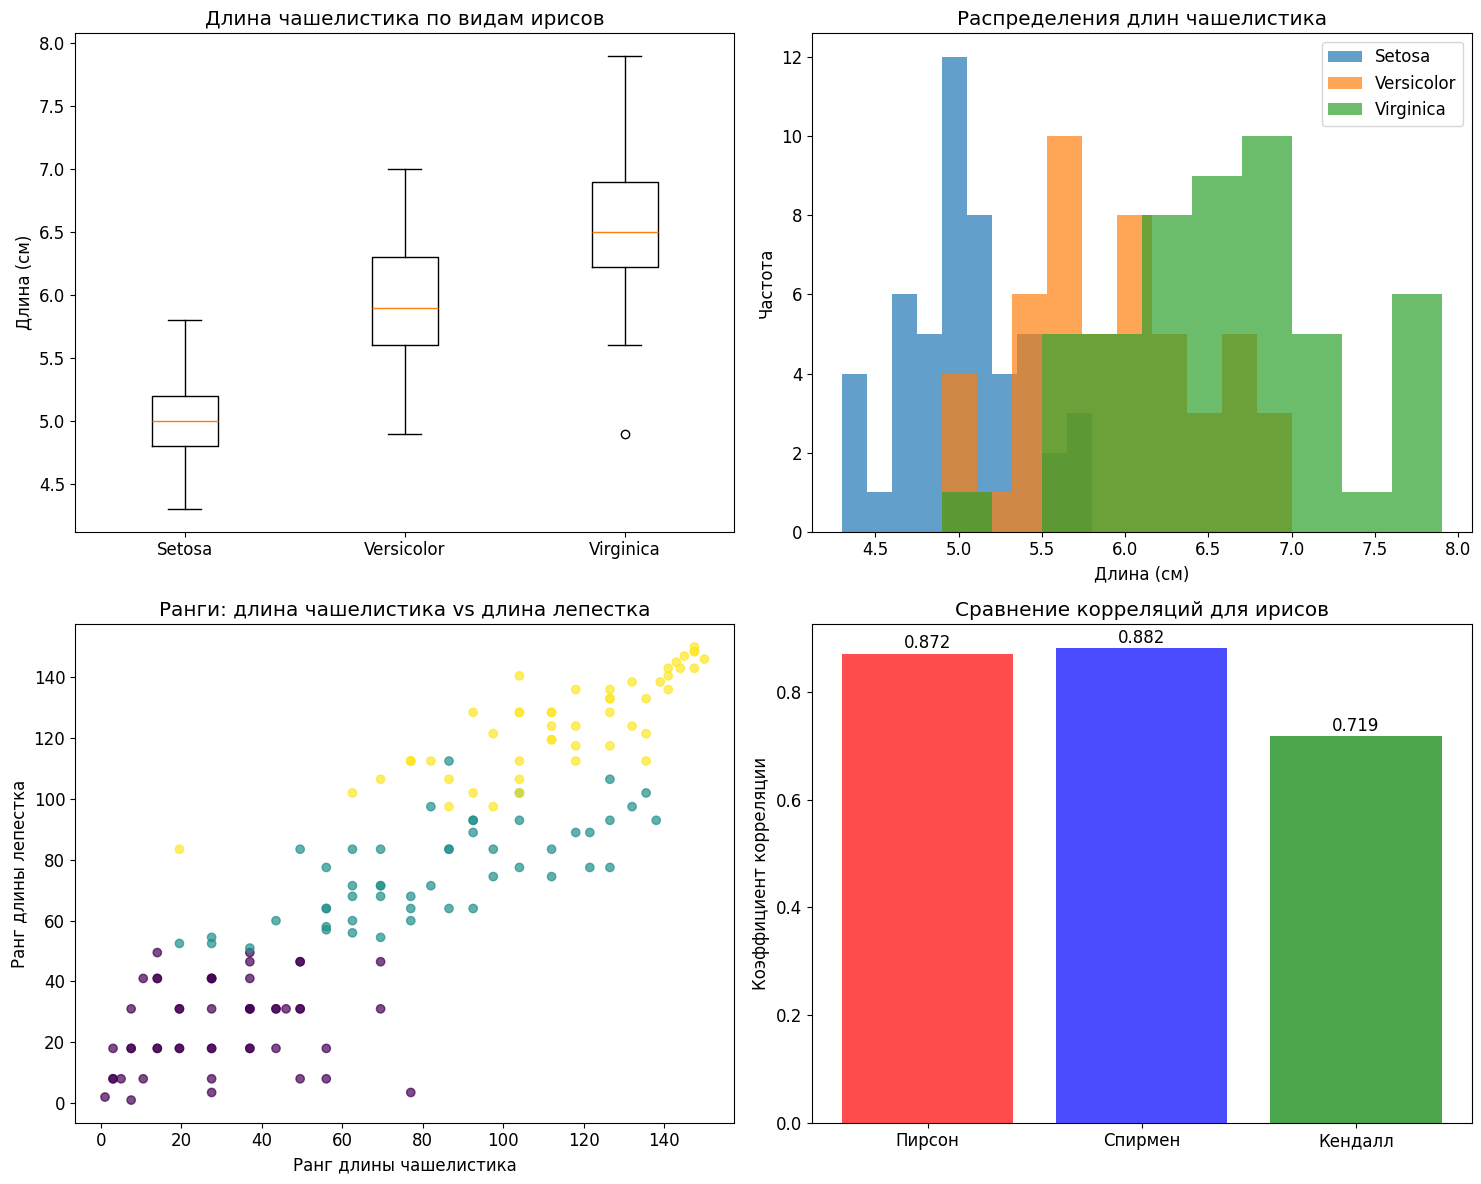

In [14]:

from sklearn.datasets import load_iris
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target

print(f"Размер данных: {iris_df.shape}")
print("\nПервые 5 строк:")
print(iris_df.head())

# Сравним длину чашелистика у разных видов ирисов
setosa = iris_df[iris_df['species'] == 0]['sepal length (cm)']
versicolor = iris_df[iris_df['species'] == 1]['sepal length (cm)']
virginica = iris_df[iris_df['species'] == 2]['sepal length (cm)']

# Критерий Манна-Уитни для всех пар
pairs = [('Setosa vs Versicolor', setosa, versicolor),
         ('Setosa vs Virginica', setosa, virginica), 
         ('Versicolor vs Virginica', versicolor, virginica)]

for name, group1, group2 in pairs:
    stat, p = stats.mannwhitneyu(group1, group2)
    print(f"{name}: U = {stat:.1f}, p = {p:.6f}")

# Корреляция Спирмена и Кендалла между признаками
spearman_corr, spearman_p = stats.spearmanr(iris_df['sepal length (cm)'], iris_df['petal length (cm)'])
kendall_corr, kendall_p = stats.kendalltau(iris_df['sepal length (cm)'], iris_df['petal length (cm)'])

print(f"\nКорреляция длина чашелистика vs длина лепестка:")
print(f"Спирмен: ρ = {spearman_corr:.3f}, p = {spearman_p:.6f}")
print(f"Кендалл: τ = {kendall_corr:.3f}, p = {kendall_p:.6f}")

# Визуализация
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Боксплот по видам
species_names = ['Setosa', 'Versicolor', 'Virginica']
data_by_species = [setosa, versicolor, virginica]

axes[0,0].boxplot(data_by_species, labels=species_names)
axes[0,0].set_title('Длина чашелистика по видам ирисов')
axes[0,0].set_ylabel('Длина (см)')

# Гистограммы
for i, (data, name) in enumerate(zip(data_by_species, species_names)):
    axes[0,1].hist(data, alpha=0.7, label=name, bins=10)
axes[0,1].set_title('Распределения длин чашелистика')
axes[0,1].set_xlabel('Длина (см)')
axes[0,1].set_ylabel('Частота')
axes[0,1].legend()

# Диаграмма рассеяния с рангами
axes[1,0].scatter(stats.rankdata(iris_df['sepal length (cm)']), 
                  stats.rankdata(iris_df['petal length (cm)']), 
                  c=iris_df['species'], alpha=0.7)
axes[1,0].set_title('Ранги: длина чашелистика vs длина лепестка')
axes[1,0].set_xlabel('Ранг длины чашелистика')
axes[1,0].set_ylabel('Ранг длины лепестка')

# Сравнение корреляций
methods = ['Пирсон', 'Спирмен', 'Кендалл']
corr_vals = [
    stats.pearsonr(iris_df['sepal length (cm)'], iris_df['petal length (cm)'])[0],
    spearman_corr,
    kendall_corr
]

axes[1,1].bar(methods, corr_vals, color=['red', 'blue', 'green'], alpha=0.7)
axes[1,1].set_title('Сравнение корреляций для ирисов')
axes[1,1].set_ylabel('Коэффициент корреляции')
for i, v in enumerate(corr_vals):
    axes[1,1].text(i, v + 0.01, f'{v:.3f}', ha='center')

plt.tight_layout()
plt.show()

## МИНИ-ПРАКТИКА:
1. Попробуйте с помощью симуляций сравнить мощность параметрического и непараметрического критерия (например, t-тест и тест Манна-Уитни)
В каких случаях одно работает лучше другого, какие случаи один из них не способен хорошо уловить?

2. Попробуйте использовать непараметрические тесты в реальных данных (например, Росстат  или соцопрос), сделайте вывод